<a href="https://colab.research.google.com/github/istabrak-abbes/spatial-computing/blob/main/Network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install osmnx
!pip install folium


Reading package lists...
Building dependency tree...
Reading state information...
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install contextily

In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS
import contextily as ctx

In [ ]:
place_name = "Tunis, Gouvernorat Tunis, Tunisie"

# Retrieve the network
graph = ox.graph_from_place(place_name, network_type='bike')

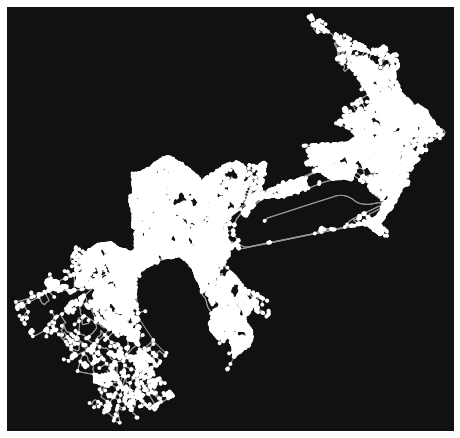

In [ ]:
# plot the graph:
fig, ax = ox.plot_graph(graph)

In [ ]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [ ]:
edges.head()

osmid lanes      ref  ... access width tunnel
u        v          key                           ...                    
93850200 93850204   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
         1089665187 0    11625417   NaN      NaN  ...    NaN   NaN    NaN
93850204 93850205   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
93850205 1089665109 0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
         103795990  0    26280274     3  RN 9 طو  ...    NaN   NaN    NaN

[5 rows x 15 columns]

In [ ]:
# Check columns
edges.columns

Index(['osmid', 'lanes', 'ref', 'name', 'highway', 'junction', 'oneway',
       'length', 'geometry', 'maxspeed', 'bridge', 'service', 'access',
       'width', 'tunnel'],
      dtype='object')

In [ ]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
edges['highway'].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential                     63150
tertiary                         7669
service                          6896
pedestrian                       3858
secondary                        2910
unclassified                     2224
track                            1088
path                             1082
trunk                             999
living_street                     732
primary                           690
trunk_link                        239
secondary_link                     93
[residential, pedestrian]          68
primary_link                       67
tertiary_link                      41
[path, residential]                36
[track, residential]               22
[service, residential]             19
[track, path]                      14
[track, service]                   12
[service, path]                    10
[service, pedestrian]              10
[living_street, residential]        8
[track, unclassified]               4
[path, pedestrian]                  4
[track, pede

In [ ]:
graph_proj = ox.project_graph(graph) 

In [ ]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [ ]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [ ]:
edges_proj.head()

osmid lanes      ref  ... access width tunnel
u          v          key                           ...                    
93850200   93850204   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
           1089665187 0    11625417   NaN      NaN  ...    NaN   NaN    NaN
93850204   93850205   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
1089665187 369985988  0    29994583   NaN      NaN  ...    NaN   NaN    NaN
93850205   1089665109 0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN

[5 rows x 15 columns]

In [ ]:
CRS(edges_proj.crs).to_epsg()

32632

#Analyzing the network properties

In [ ]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats


/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'circuity_avg': 1.053528898089581,
 'edge_length_avg': 65.71362056328702,
 'edge_length_total': 6043024.5469998745,
 'intersection_count': 30769,
 'k_avg': 5.335808987786127,
 'm': 91960,
 'n': 34469,
 'self_loop_proportion': 0.001739721644536874,
 'street_length_avg': 67.05183850583987,
 'street_length_total': 3353128.3400000404,
 'street_segment_count': 50008,
 'streets_per_node_avg': 2.9081783631669036,
 'streets_per_node_counts': {0: 0,
  1: 3700,
  2: 60,
  3: 26462,
  4: 4209,
  5: 30,
  6: 6,
  7: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.10734282978908584,
  2: 0.001740694537120311,
  3: 0.7677043140212945,
  4: 0.12210972177898982,
  5: 0.0008703472685601555,
  6: 0.0001740694537120311,
  7: 5.80231512373437e-05}}

#Shortest path analysis

In [ ]:
# Set place name
placename = "Faculté de médecine de Tunis"

In [ ]:
# Geocode the place name
geocoded_place = ox.geocode_to_gdf(placename)

In [ ]:
# Check the result
geocoded_place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((10.15368 36.80476, 10.15371 36.80433...",36.804772,36.802532,10.157991,10.153685,122244449,way,95139164,36.803957,10.15606,"كلية الطب بتونس, نهج كلية الطب, Borj Zouara, ب...",amenity,university,0.111


In [ ]:
# Re-project into the same CRS as the road network
geocoded_place = geocoded_place.to_crs(CRS(edges_proj.crs))

In [ ]:
# Get centroid as shapely point
origin = geocoded_place["geometry"].centroid.values[0]

In [ ]:
print(origin)

POINT (603128.9840019947 4073731.34712621)


In [ ]:
# Set place name
placename = "École Nationale d'ingénieurs de Tunis"

# Geocode the place name
geocoded_place = ox.geocode_to_gdf(placename)

# Re-project into the same CRS as the road network
geocoded_place = geocoded_place.to_crs(CRS(edges_proj.crs))

# Get centroid of the polygon as shapely point
destination = geocoded_place["geometry"].centroid.values[0]

print(destination)

POINT (602150.7916483599 4076633.90842453)


##Nearest node

In [ ]:
# Get origin x and y coordinates
orig_xy = (origin.y, origin.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

In [ ]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node_id

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


1103641963

In [ ]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node_id

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


1314670936

In [ ]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

In [ ]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,street_count,lon,lat,highway,geometry
1103641963,4.073748e+06,603080.935017,3,10.155542,36.80396,NaN,POINT (603080.935 4073748.148)
1314670936,4.076659e+06,602169.341274,1,10.145716,36.83029,NaN,POINT (602169.341 4076658.582)


##Routing

In [ ]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node_id, target=target_node_id, weight='length')

# Show what we have
print(route)

[1103641963, 1103641882, 1103641832, 1103641943, 1145532607, 1103641838, 1145538520, 1145536697, 1145538740, 1143689509, 1907068813, 1906763767, 366202008, 5124963812, 1145533253, 1715145118, 1715145143, 1715145147, 1831965617, 1715145156, 366201995, 6771333884, 6771333883, 366202004, 6771333882, 6771333881, 309324505, 309324517, 309324396, 6801619546, 368245354, 1690285491, 1690285493, 396032590, 367002434, 393261262, 393261267, 6773563831, 6598705400, 393261273, 393537810, 316117890, 1236383262, 1322983844, 316117893, 1239680883, 1322982178, 1236383062, 316117899, 316117903, 316117905, 316117908, 392962776, 316117909, 393535873, 393544672, 1234974598, 1236105577, 368237687, 394919760, 393539914, 1174475428, 1237104030, 368237669, 1234974615, 6616361662, 368237668, 6616361661, 368237700, 618464194, 6603390600, 618463758, 618463650, 618463465, 618461258, 1236585866, 1314682715, 1314682718, 1314670936]


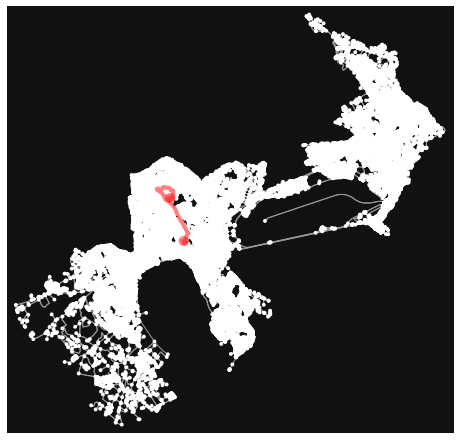

In [ ]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)

In [ ]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
1103641963,4.073748e+06,603080.935017,3,10.155542,36.803960,NaN,POINT (603080.935 4073748.148)
1103641882,4.073670e+06,603098.397813,3,10.155727,36.803251,NaN,POINT (603098.398 4073669.727)
1103641832,4.073653e+06,603089.743707,3,10.155628,36.803099,NaN,POINT (603089.744 4073652.703)
1103641943,4.073644e+06,603090.816571,3,10.155639,36.803017,NaN,POINT (603090.817 4073643.662)
1145532607,4.073636e+06,603105.172462,3,10.155799,36.802949,NaN,POINT (603105.172 4073636.291)
...,...,...,...,...,...,...,...
618461258,4.076601e+06,602099.976429,3,10.144930,36.829775,NaN,POINT (602099.976 4076600.577)
1236585866,4.076638e+06,602098.347133,3,10.144917,36.830115,NaN,POINT (602098.347 4076638.304)
1314682715,4.076638e+06,602105.036066,3,10.144992,36.830115,NaN,POINT (602105.036 4076638.340)


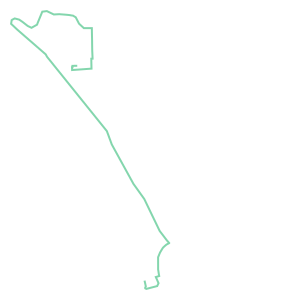

In [ ]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [ ]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])


In [ ]:
route_geom['osmids']=''

In [ ]:
route_nodes=route_nodes.reset_index()


In [ ]:
# Add a list of osmids associated with the route
route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))

# Calculate the route length
route_geom['length_m'] = route_geom.length

route_geom.head()


,geometry,osmids,length_m
0,"LINESTRING (603080.935 4073748.148, 603098.398...","[1103641963, 1103641882, 1103641832, 110364194...",7023.125281


In [ ]:
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [ ]:
buildings_proj = buildings.to_crs(CRS(edges_proj.crs))

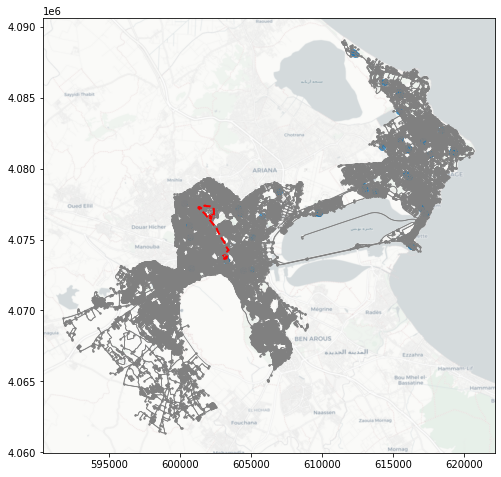

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot edges and nodes
edges_proj.plot(ax=ax, linewidth=0.75, color='gray')
nodes_proj.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=30, color='red')

# Add basemap
ctx.add_basemap(ax, crs=buildings_proj.crs, source=ctx.providers.CartoDB.Positron)

In [ ]:
edges_proj.head()

osmid lanes      ref  ... access width tunnel
u          v          key                           ...                    
93850200   93850204   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
           1089665187 0    11625417   nan      NaN  ...    NaN   NaN    NaN
93850204   93850205   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
1089665187 369985988  0    29994583   nan      NaN  ...    NaN   NaN    NaN
93850205   1089665109 0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN

[5 rows x 15 columns]